In [1]:
#Import necessary libraries
import os
import pandas as pd
import rasterio
from rasterio.plot import plotting_extent
import bokeh
import numpy as np
import matplotlib as mlp
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline 
import seaborn as sns

In [2]:
countries_tif = rasterio.open('countries.tif')

In [3]:
tif1 = rasterio.open('C:\\Users\\NM12LQ\\OneDrive - Aalborg Universitet\\PhDCourses\\3. Python\\Geospatial-Analysis-Notebooks_assignment\\france_ssp2010.tif')
tif2 = rasterio.open('C:\\Users\\NM12LQ\\OneDrive - Aalborg Universitet\\PhDCourses\\3. Python\\Geospatial-Analysis-Notebooks_assignment\\france_ssp2100.tif')


In [8]:
pop1 = tif1.read(1)
pop2 = tif2.read(1)
print(pop1)

[[2147483647 2147483647 2147483647 ... 2147483647 2147483647 2147483647]
 [2147483647 2147483647 2147483647 ... 2147483647 2147483647 2147483647]
 [2147483647 2147483647 2147483647 ... 2147483647 2147483647 2147483647]
 ...
 [2147483647 2147483647 2147483647 ...       2280       1967 2147483647]
 [2147483647 2147483647 2147483647 ...       2834       2978 2147483647]
 [2147483647 2147483647 2147483647 ...       1532 2147483647 2147483647]]


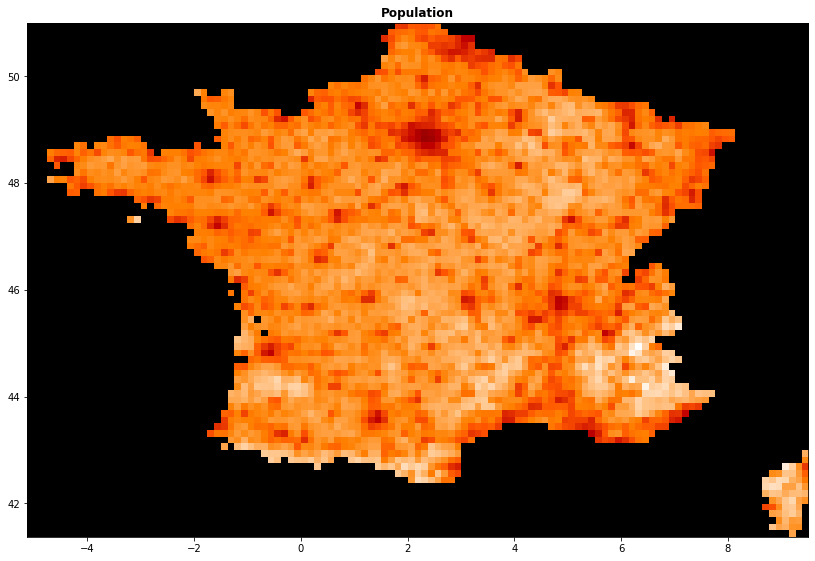

In [6]:
from matplotlib.colors import LogNorm

plt.figure(figsize=(14, 14))
show((tif1, 1), title='Population', norm=LogNorm(), cmap='gist_heat_r')

In [17]:
np.sum(pop1)

-2086971195

In [14]:
pop1[pop1 < 0] = 0

In [15]:
np.sum(pop1)

-2086971195

In [ ]:
selection_country = countries == 250 # = Austria
selection_country

rural = []
urban = []
total = []
Years = []

for subdir, dirs, files in os.walk(path):
    for file in files:
        #print(subdir,file)
        if file.endswith(".tif"):
            name = file.split(".tif")[0]
            #print(name)
            if "rur" in file:
                nameRural = file.split(".tif")[0]
                directories_rural=os.path.join(subdir, file)
                rural.append(directories_rural)
                #print()
            if "urb" in file:
                nameUrban = file.split(".tif")[0]
                directories_urban=os.path.join(subdir, file)
                urban.append(directories_urban)
            if "_" in file:
                nameTotal = file.split("_")[1]
                years = nameTotal.split(".tif")[0]        
                directories_total=os.path.join(subdir, file)
                total.append(directories_total)
                Years.append(years)
                
UrbanPop = []
TotalPop = []
RuralPop = []
for u in urban:
    tif_u=rasterio.open(u)
    pop_u = tif_u.read(1)
    pop_u[pop_u < 0] = 0
    urban_pop=np.sum(pop_u[selection_country])
    UrbanPop.append(urban_pop)
    
for x in total:
    tif_x=rasterio.open(x)
    pop_x = tif_x.read(1)
    pop_x[pop_x < 0] = 0
    total_pop=np.sum(pop_x[selection_country])
    TotalPop.append(total_pop)

for y in rural:
    tif_y=rasterio.open(y)
    pop_y = tif_y.read(1)
    pop_y[pop_y < 0] = 0
    rural_pop=np.sum(pop_y[selection_country])
    RuralPop.append(rural_pop)
    
# Data
df=pd.DataFrame({'x': Years, 'y': TotalPop, 'y1': UrbanPop })
 
# multiple line plot
plt.plot( 'x', 'y', data=df, marker='', color='blue', linewidth=2, label="Total Population")
plt.plot( 'x', 'y1', data=df, marker='', color='skyblue', linewidth=2, label="Urban Population")
#plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="Rural Population" )
plt.legend()

In [ ]:
with rasterio.open('popdynamics\\SSP4\\Total\\GeoTIFF\\ssp4_2010.tif') as src:
    ras_data = src.read()
    ras_meta = src.profile
with rasterio.open('population_difference1.tif', 'w', **ras_meta) as dst:
    dst.write(diff, 1)

In [ ]:
with rasterio.open(
    'population_difference0.tif',
    'w',
    driver='GTiff',
    height=diff.shape[0],
    width=diff.shape[1],
    count=1,
    dtype=diff.dtype,
    crs='+proj=latlong'
) as dst:
    dst.write(diff, 1)